### Linear regression with gradient descent and MSE loss function

## https://github.com/mahamadAhmed/Linear_regression_with_Gradient_Descent

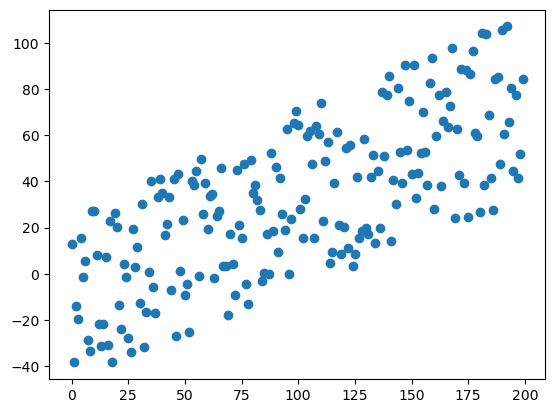

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(200)
delta = np.random.uniform(-50,30, size=(200,))
y = .4 * x +3 + delta

plt.scatter(x, y)
plt.show()


In [30]:
#Split dataset
train_size = int(len(x) * 0.8)
train_x, train_y = x[:train_size], y[:train_size]

test_x, test_y = x[train_size:], y[train_size:]


In [31]:
import random
w = 1
b = 1
eta  = 0.0001
iterations  = 1000


In [32]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [35]:
def gradient_descent(x, y_true, w, b):
    # Initialize lists to store loss and parameters
    losses = 0
    weights = 0
    biases = 0

    for i in range(iterations ):
        # Calculate y_pred and loss
        y_pred = w * x + b
        loss = mse_loss(y_true, y_pred)
        losses=loss
        
        # Calculate gradients
        dw = np.mean((y_pred - y_true) * x)
        db = np.mean(y_pred - y_true)

        # Update weights and biases
        w -= eta  * dw
        b -= eta  * db
        weights=w
        biases=b

    return losses, weights, biases

# Train the model using gradient descent
losses, weights, biases = gradient_descent(train_x, train_y, w, b)

In [36]:
print("weights: ", weights)
print("biases: ", biases)


y_pred = weights * test_x + biases


# Calculate MSE on test set
accuracy = mse_loss(test_y, y_pred)
print("accuracy:", accuracy)

weights:  0.32542990646708314
biases:  0.7429790062541213
accuracy: 631.9817776235993


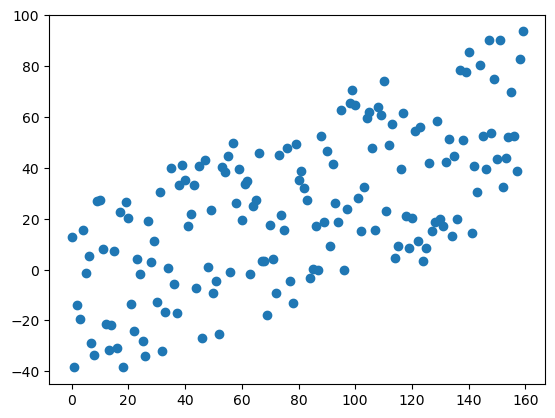

In [37]:
plt.scatter(train_x, train_y)
plt.show()

In [2]:
import random

# Define constants
POPULATION_SIZE = 100
NUM_GENES = 4
MAX_VALUE = 30
TARGET = 30

# Define fitness function
def fitness(chromosome):
    #Calculate value of obj function
    result = sum((i+1)*chromosome[i] for i in range(NUM_GENES))
    return abs(result - TARGET)

In [ ]:
def selection(population, num_parents):
    parents = []
    for i in range(num_parents):
        a = random.choice(population)
        b = random.choice(population)
        if fitness(a) < fitness(b):
            parents.append(a)
        else:
            parents.append(b)
    return parents

In [3]:
def crossover(parents):
    crossover_point = random.randint(1, NUM_GENES-1)
    offspring1 = parents[0][:crossover_point] + parents[1][crossover_point:]
    offspring2 = parents[1][:crossover_point] + parents[0][crossover_point:]
    return offspring1, offspring2


In [4]:
def mutation(offspring):
    for i in range(NUM_GENES):
        if random.random() < 0.1:
            offspring[i] = random.randint(0, MAX_VALUE)
    return offspring

In [9]:
population = [[random.randint(0, MAX_VALUE) for j in range(NUM_GENES)] for i in range(POPULATION_SIZE)]

for generation in range(1000):
    fitness_scores = [fitness(chromosome) for chromosome in population]

    best_chromosome = population[fitness_scores.index(min(fitness_scores))]



    parents = selection(population, 2)

    offspring1, offspring2 = crossover(parents)

    offspring1 = mutation(offspring1)
    offspring2 = mutation(offspring2)

    population[fitness_scores.index(max(fitness_scores))] = offspring1
    population[fitness_scores.index(sorted(fitness_scores)[-2])] = offspring2


In [14]:
print(f"Final Choromosome: {best_chromosome} (fitness={fitness(best_chromosome)})")

Final Choromosome: [6, 3, 2, 3] (fitness=0)
